In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("IRIS.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [4]:

df= df[df['species'] != 'Iris-virginica']
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,Iris-versicolor
96,5.7,2.9,4.2,1.3,Iris-versicolor
97,6.2,2.9,4.3,1.3,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor


In [5]:
df['species'].count()


100

In [6]:
# Eliminar las columnas 'petal_width' y 'sepal_width'
df = df.drop(['petal_width', 'sepal_width'], axis=1)

# Mostrar las primeras filas para confirmar
print(df.head())

   sepal_length  petal_length      species
0           5.1           1.4  Iris-setosa
1           4.9           1.4  Iris-setosa
2           4.7           1.3  Iris-setosa
3           4.6           1.5  Iris-setosa
4           5.0           1.4  Iris-setosa


In [7]:
df['species']=np.where(df['species']== 'Iris-setosa', 1,0)

In [8]:
df

,sepal_length,petal_length,species
0,5.1,1.4,1
1,4.9,1.4,1
2,4.7,1.3,1
3,4.6,1.5,1
4,5.0,1.4,1
...,...,...,...
95,5.7,4.2,0
96,5.7,4.2,0
97,6.2,4.3,0
98,5.1,3.0,0


In [9]:
#Entradas
inputs = df.drop(columns=['species']).values

#Salidas
labels = df['species'].values

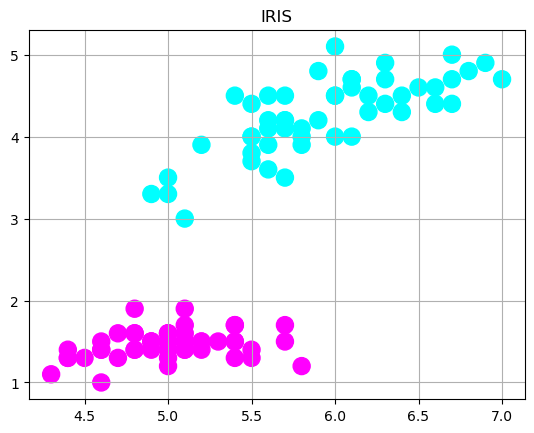

In [10]:
plt.scatter(inputs[:,0], inputs[:,1], c=labels, cmap='cool', marker = 'o', s= 150)
plt.title('IRIS')
plt.xlabel('')
plt.ylabel('')
plt.grid(True)
plt.show()

In [608]:
# Definicion de hiperparametros
learning_rate = 0.0535#0.032807
bias = np.random.rand() # 0.122
epochs = 10
weights = np.random.rand(2) #[0.356, 0.259]  No es hiperparametro

In [140]:
# Clase Perceptron
class Perceptron():
    def __init__(self, inputs, labels, learning_rate, weights, bias, epochs = 20):
        self.inputs = inputs
        self.labels = labels
        self.learning_rate = learning_rate
        self.weights = weights
        self.bias = bias
        self.epochs = epochs
    
    def activation(self, z):
        return 1 if z > 0 else 0 

    def predict(self, input_x, weights_ajus, bias_ajus):
        # Calcular la funcion ponderada z
        z = np.dot(input_x, weights_ajus) + bias_ajus
        # Calcular y predicha
        y_pred = self.activation(z)
        return y_pred

    def classify(self, features, w, b):
        result = self.predict(features, w, b)
        label = "Iris-setosa" if result == 1 else "Iris-versicolor"
        print(f"{features} --> {label}")
        
    def fit(self):
        # Abrir un ciclo de acuerdo a las iteraciones (Epochs)
        for epoch in range(self.epochs):
            print(f"Epoch: {epoch+1}/{self.epochs}", end= " ")

            # variable para obtener el error por cada epoch
            total_error = 0
            # Abrir ciclo para recorres las entradas
            for input, label in zip(self.inputs, self.labels):
                #print(f"Input {input}, Label: {label}")
                # Calcular la funcion ponderada z
                z = np.dot(input, self.weights) + self.bias
                # Calcular y predicha
                y_pred = self.activation(z)
                #Calcular el error
                error = label - y_pred
                total_error += abs(error)
                # Calcular el delta W
                delta_w = self.learning_rate * error * input
                # Actualizar los weights
                self.weights = self.weights + delta_w
                # Actualizar el bias
                delta_bias = self.learning_rate * error
                self.bias = self.bias + delta_bias
            # Calcular el error promedio
            average_error = total_error/len(self.labels)
            print(f"Average Error: {average_error}")
                
        #Retornar lso pesos y bias actualizados
       
        return self.weights, self.bias
                


In [610]:
perceptron = Perceptron(inputs, labels, learning_rate, weights, bias, 10)

w, b = perceptron.fit()
print(f"Weights fit: {w}, Bias fit {b}")

Epoch: 1/10 Average Error: 0.03
Epoch: 2/10 Average Error: 0.01
Epoch: 3/10 Average Error: 0.0
Epoch: 4/10 Average Error: 0.0
Epoch: 5/10 Average Error: 0.0
Epoch: 6/10 Average Error: 0.0
Epoch: 7/10 Average Error: 0.0
Epoch: 8/10 Average Error: 0.0
Epoch: 9/10 Average Error: 0.0
Epoch: 10/10 Average Error: 0.0
Weights fit: [ 0.08642612 -0.46143841], Bias fit 0.7333646091348253


In [22]:
print(f"[5.1, 3.5, 1.4, 0.2] --> {perceptron.predict([5.1, 1.4], w, b)}")  # Setosa (0)
print(f"[6.0, 2.2, 4.0, 1.0] --> {perceptron.predict([6.0, 4.0,], w, b)}")  # Versicolor (1)
print(f"[4.9, 3.0, 1.4, 0.2] --> {perceptron.predict([4.9, 1.4, 0.2], w, b)}")  # Setosa (0)
print(f"[5.7, 2.8, 4.1, 1.3] --> {perceptron.predict([5.7, 2.8, 4.1, 1.3], w, b)}")  # Versicolor (1)

[5.1, 3.5, 1.4, 0.2] --> 1
[6.0, 2.2, 4.0, 1.0] --> 0
[4.9, 3.0, 1.4, 0.2] --> 1
[5.7, 2.8, 4.1, 1.3] --> 0


In [28]:
# Predicciones para algunas muestras de ejemplo
perceptron.classify([5.1, 1.4], w, b)  # Setosa
perceptron.classify([6.0, 4.0,], w, b)  # Versicolor
perceptron.classify([4.9, 1.4], w, b)  # Setosa
perceptron.classify([5.7, 4.1,], w, b)  # Versicolor

[5.1, 1.4] --> Iris-setosa
[6.0, 4.0] --> Iris-versicolor
[4.9, 1.4] --> Iris-setosa
[5.7, 4.1] --> Iris-versicolor


In [616]:
# Guardar los datos en un dataset nuevo y limpio
df.to_csv("IRIS_Perceptron.csv")